In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

# getStructuringElement()函数

getStructuringElement()函数可用于构造一个特定大小和形状的结构元素，用于图像形态学中获得核。

函数构建并返回一个结构元素，可以被作为参数传递给 erode，dilate或morphologyEx函数

retval = cv.getStructuringElement(shape, ksize[, anchor])
        
        shape:核的形状
                cv2.MORPH_RECT: 矩形
                cv2.MORPH_CROSS: 十字形(以矩形的锚点为中心的十字架)
                cv2.MORPH_ELLIPSE:椭圆(矩形的内切椭圆）
                
        ksize: 核的大小，矩形的宽，高格式为(width,height)
        anchor: 核的锚点，默认值为(-1,-1),即核的中心点

# 形态学处理
通过阈值化分割可以得到二值图，但往往会出现图像中物体形态不完整，变的残缺，可以通过形态学处理，使其变得丰满，或者去除掉多余的像素。常用的形态学处理算法包括：腐蚀，膨胀，开运算，闭运算，形态学梯度，顶帽运算和底帽运算。

# 腐蚀 erode()

腐蚀操作有一个核，取核中像素值的最小值代替锚点位置的像素值，这样就会使图像中较暗的区域面积增大，较亮的的区域面积减小。如果是一张黑底，白色前景的二值图，就会使白色的前景物体颜色变小，就像被腐蚀了一样。

dst=cv2.erode(src,kernel,anchor,iterations,borderType,borderValue):

        src: 输入图像对象矩阵,为二值化图像
        kernel:进行腐蚀操作的核，可以通过函数getStructuringElement()获得
        anchor:锚点，默认为(-1,-1)
        iterations:腐蚀操作的次数，默认为1
        borderType: 边界种类，有默认值
        borderValue:边界值，有默认值

# 膨胀 dilate()

dst = cv2.dilate(src,kernel,anchor,iterations,borderType,borderValue)
        
        src: 输入图像对象矩阵,为二值化图像
        kernel:进行膨胀操作的核，可以通过函数getStructuringElement()获得
        anchor:锚点，默认为(-1,-1)
        iterations:腐蚀操作的次数，默认为1
        borderType: 边界种类
        borderValue:边界值

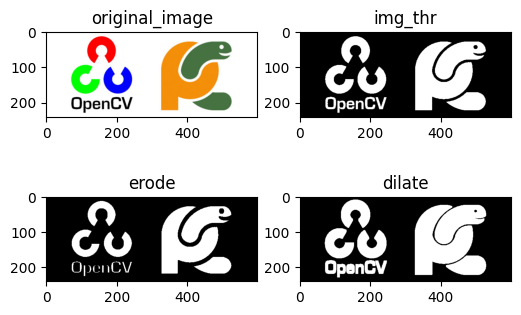

In [78]:
img = cv.imread(r"./images/pycharm_opencv_logos.jpg")
img = img[:,:,[2,1,0]] # BGR 转 RGB
img_cvt = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
ret,img_thr = cv.threshold(img_cvt,200,255,cv.THRESH_BINARY_INV)
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,5))
erode = cv.erode(img_thr,kernel,iterations=1)
dilate = cv.dilate(img_thr,kernel,iterations=1)


plt.rcParams['figure.dpi'] = 100 #分辨率

plt.figure()
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')# 所有的默认加上cmap='gray'，以防止真的是灰度图
plt.title("original_image")
plt.subplot(2,2,2)
plt.imshow(img_thr, cmap='gray')
plt.title("img_thr")
plt.subplot(2,2,3)
plt.imshow(erode, cmap='gray')
plt.title("erode")
plt.subplot(2,2,4)
plt.imshow(dilate, cmap='gray')
plt.title("dilate")
plt.show()

下面看下cv2.imshow()和plt.imshow()的区别

    什么时候使用plt.show()，什么时候用cv2.imshow()?
    如果需要展示读入的图像，或者展示对读入图像进行一系列操作后的图像时，使用cv2.imshow()
    如果不需要展示原始图像，而是绘制一张新的图像，使用plt.imshow()
    其实两者都可以，但要注意的是opencv是BGR通道，plt默认RGB通道，若使用cv2.imread()读入图像，用plt.imshow()展示原始图像或者展示对读入图像进行一系列操作后的图像时，需要进行通道转换。
    在展示灰度图像时，cv2.imshow(‘gray’, gray)
    plt.imshow(gray,cmap=‘gray’), plt.title(‘gray’)

# 其他形态学处理

- 开运算：先进行腐蚀操作，后进行膨胀操作，主要用来去除一些较亮的部分，即先腐蚀掉不要的部分，再进行膨胀。

- 闭运算：先进行膨胀操作，后进行腐蚀操作，主要用来去除一些较暗的部分。

- 形态学梯度：膨胀运算结果减去腐蚀运算结果，可以拿到轮廓信息。

- 顶帽运算：原图像减去开运算结果。

- 底帽运算：原图像减去闭运算结果。　　

进行开运算，闭运算，顶帽运算，底帽运算，形态学梯度，opencv提供了一个统一的函数cv2.morphologyEx()，其对应参数如下：

dst = cv2.morphologyEx(src,op,kernel,anchor,iterations,borderType,borderValue)
        
        src: 输入图像对象矩阵,为二值化图像
        op: 形态学操作类型
            cv2.MORPH_OPEN    开运算
            cv2.MORPH_CLOSE   闭运算
            cv2.MORPH_GRADIENT 形态梯度
            cv2.MORPH_TOPHAT   顶帽运算
            cv2.MORPH_BLACKHAT  底帽运算
            
        kernel:进行腐蚀操作的核，可以通过函数getStructuringElement()获得
        anchor:锚点，默认为(-1,-1)
        iterations:腐蚀操作的次数，默认为1
        borderType: 边界种类
        borderValue:边界值

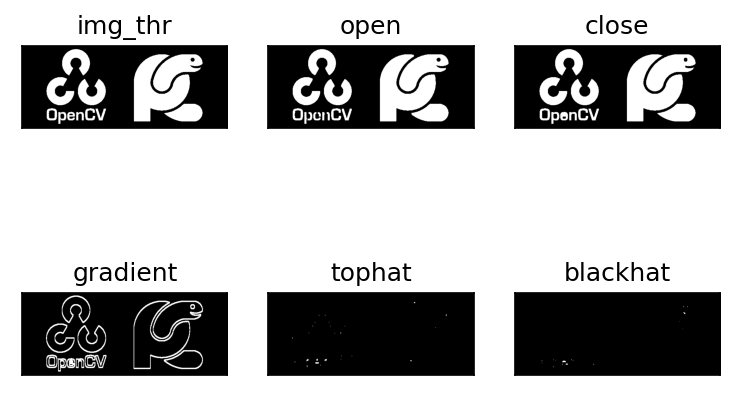

In [81]:
open = cv.morphologyEx(img_thr,cv.MORPH_OPEN,kernel,iterations=1)
close = cv.morphologyEx(img_thr,cv.MORPH_CLOSE,kernel,iterations=1)
gradient = cv.morphologyEx(img_thr,cv.MORPH_GRADIENT,kernel,iterations=1)
tophat = cv.morphologyEx(img_thr,cv.MORPH_TOPHAT,kernel,iterations=1)
blackhat = cv.morphologyEx(img_thr,cv.MORPH_BLACKHAT,kernel,iterations=1)

plt.rcParams['figure.dpi'] = 150 #分辨率
images=[img_thr,open,close,gradient,tophat,blackhat]
titles=["img_thr","open","close","gradient","tophat","blackhat"]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.xticks([]),    plt.yticks([])
plt.show()


## 应用实例

有如下一张中文图片，当我们进行字符切割时，常需要知道其中的汉字是否带下划线，方便进行后续处理。

我们首先想到的可能是使用霍夫直线检测算法，但是直接检测时，会有很多干扰。我们可以通过采用一个横向的矩阵核，来腐蚀字体，使图片中只剩下下划线，然后再进行霍夫直线检测，这样干扰小，准确度会高很多。具体实现代码和效果如下：

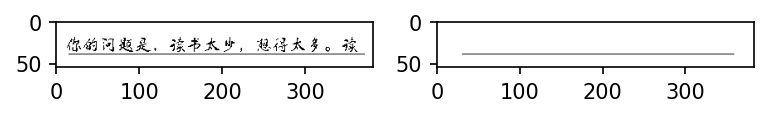

In [85]:
img = cv.imread(r"./images/word_underline.png")
img = img[:,:,[2,1,0]] # BGR 转 RGB
img_cvt = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
ret,img_thr = cv.threshold(img_cvt,100,255,cv.THRESH_BINARY)
kernel = cv.getStructuringElement(cv.MORPH_RECT,(30,1)) #由于是1*30的矩阵，字体会被横向空隙的白色腐蚀掉，而下划线横向都是黑色，不会腐蚀
dst = cv.dilate(img_thr,kernel,iterations=1)  #由于是白底黑字，所有进行膨胀操作来去除黑色字体
plt.subplot(1,2,1)
plt.imshow(img_thr,"gray")
plt.subplot(1,2,2)
plt.imshow(dst,"gray")

# 霍夫直线检测-HoughLinesP()

HoughLinesP(image, rho, theta, threshold, lines=None, minLineLength=None, maxLineGap=None) 

    image： 必须是二值图像，推荐使用canny边缘检测的结果图像； 
    rho: 线段以像素为单位的距离精度，double类型的，推荐用1.0 
    theta： 线段以弧度为单位的角度精度，推荐用numpy.pi/180 
    threshod: 累加平面的阈值参数，int类型，超过设定阈值才被检测出线段，值越大，基本上意味着检出的线段越长，检出的线段个数越少。根据情况推荐先用100试试
    lines：这个参数的意义未知，发现不同的lines对结果没影响，但是不要忽略了它的存在 
    minLineLength：线段以像素为单位的最小长度，根据应用场景设置 
    maxLineGap：同一方向上两条线段判定为一条线段的最大允许间隔（断裂），超过了设定值，则把两条线段当成一条线段，值越大，允许线段上的断裂越大，越有可能检出潜在的直线段

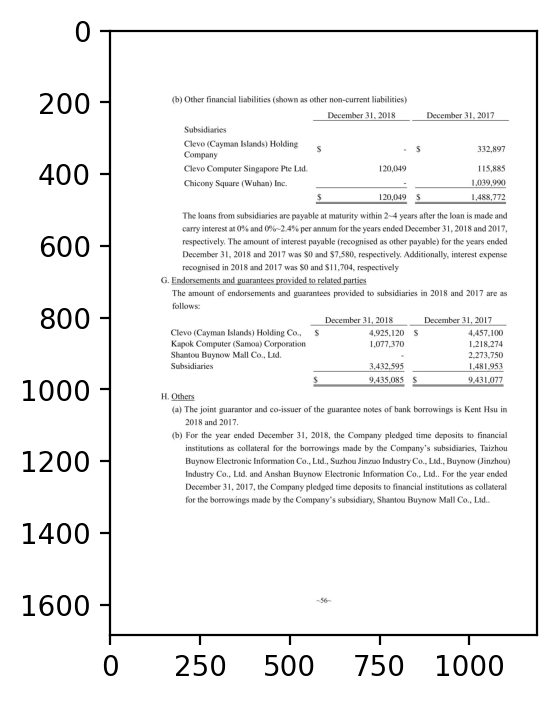

In [9]:
image = cv.imread(r"./images/4.jpg")
# 二值化
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.rcParams['figure.dpi'] = 200 #分辨率
plt.imshow(gray,"gray")

In [15]:
binary = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, -10)

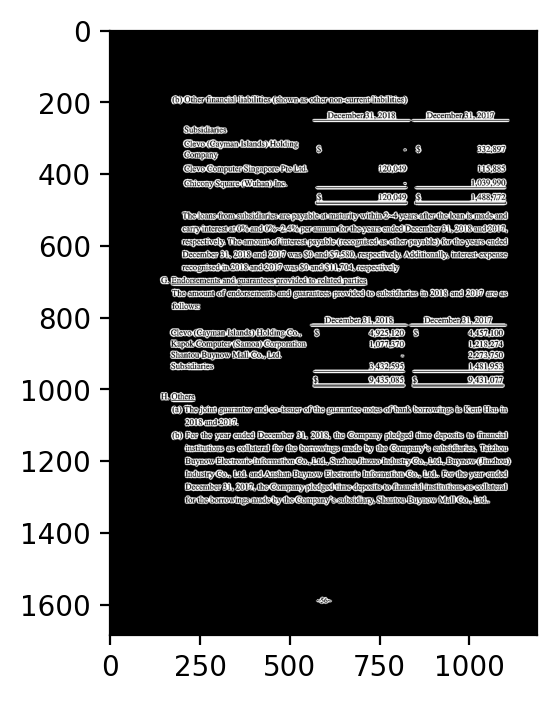

In [16]:
plt.imshow(binary,"gray")
# cv2.waitKey(0)

In [ ]:
rows, cols = binary.shape
scale = 20
# 识别横线
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (cols // scale, 1))
eroded = cv2.erode(binary, kernel, iterations=1)
# cv2.imshow("Eroded Image",eroded)
dilatedcol = cv2.dilate(eroded, kernel, iterations=1)
# cv2.imshow("Dilated Image",dilatedcol)
# cv2.waitKey(0)

# 识别竖线
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, rows // scale))
eroded = cv2.erode(binary, kernel, iterations=1)
dilatedrow = cv2.dilate(eroded, kernel, iterations=1)
# cv2.imshow("Dilated Image",dilatedrow)
# cv2.waitKey(0)

# 标识交点
bitwiseAnd = cv2.bitwise_and(dilatedcol, dilatedrow)
# cv2.imshow("bitwiseAnd Image",bitwiseAnd)
# cv2.waitKey(0)

# 标识表格
merge = cv2.add(dilatedcol, dilatedrow)

表格检测：https://www.jianshu.com/p/b85667a4ef76